In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.colors import Colormap
import matplotlib.cm as cm

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
data = 'data.csv'

df = pd.read_csv(data)

In [3]:
df.columns

Index([u'Star', u'Age', u'Ageerr', u'Prot', u'Perr', u'Teff', u'Tefferr',
       u'log', u'g', u'vsi', u'ni', u'Vm', u'ic', u'Vr', u'Vrerr', u'i',
       u'ierr1', u'ierr2', u'L', u'Lerr', u'R', u'Rerr', u'M', u'Merr1',
       u'Merr2', u'tau', u'_conv', u'cerr', u'Ros', u'sby', u'sberr', u'<B>',
       u'B_max', u'pol.', u'tor.', u'dip.', u'quad.', u'oct.', u'axisym',
       u'axisym.1', u'axisym.2', u'axisym.3', u'tor', u'l1 tor', u'l2 torl3'],
      dtype='object')

In [4]:
def makeshape(paramX, paramY):
    xx = [-1.*paramX, 1.*paramX, 1.*paramX, -1.*paramX, -1*paramX]
    yy = [-1.*paramY, -1.*paramY, 1.*paramY, 1.*paramY, -1*paramY]
    out = list(zip(xx, yy))
    return out

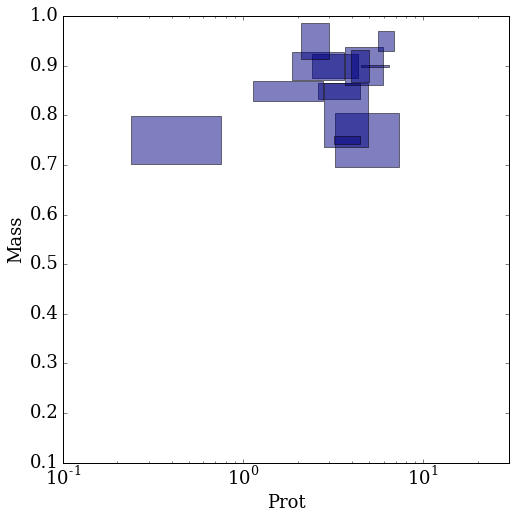

In [29]:
plt.figure(figsize=(8,8))

for k in range(len(df['axisym'])):
    plt.scatter(df['Prot'][k], df['M'][k], s=((df['B_max'][k])*10), 
                c=df['pol.'][k], cmap=cm.jet, marker=None, alpha=0.5, 
                verts=makeshape(2-df['axisym'][k]/100.,df['axisym'][k]/50.))

# plt.yscale('log')
plt.xscale('log')

plt.ylim(1e-1, 1)
plt.xlim(1e-1, 30)

plt.xlabel('Prot')
plt.ylabel('Mass')